In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/stud.csv')

In [3]:
df['Total_score']=df["math_score"]+df["reading_score"]+df["writing_score"]

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [5]:
x=df.drop(columns=['Total_score'], axis=1)

In [6]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
print(" Categories in 'gender' variable:", end="")
print(df['gender'].unique())
print(" Categories in 'race_ethnicity' variable:", end="")
print(df['race_ethnicity'].unique())
print(" Categories in 'parental_level_of_education' variable:", end="")
print(df['parental_level_of_education'].unique())
print(" Categories in 'lunch' variable:", end="")
print(df['lunch'].unique())
print(" Categories in 'test_preparation_course' variable:", end="")
print(df['test_preparation_course'].unique())

 Categories in 'gender' variable:['female' 'male']
 Categories in 'race_ethnicity' variable:['group B' 'group C' 'group A' 'group D' 'group E']
 Categories in 'parental_level_of_education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 Categories in 'lunch' variable:['standard' 'free/reduced']
 Categories in 'test_preparation_course' variable:['none' 'completed']


In [8]:
y=df['Total_score']

In [9]:

y

,Total_score
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


In [10]:
num_features= x.select_dtypes(exclude="object").columns
cat_features= x.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer= OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler",numeric_transformer, num_features)
    ]
)


In [11]:
x=preprocessor.fit_transform(x)

In [12]:
x.shape

(1000, 20)

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 20), (200, 20))

In [14]:
def evaluate_model(true, predicted):
  mae= mean_absolute_error(true, predicted)
  mse= mean_squared_error(true, predicted)
  rmse= np.sqrt(mean_squared_error(true, predicted))
  r2_square= r2_score(true, predicted)
  return mae, rmse, r2_square

In [16]:
models={
    "Linear_Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train, y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)


  model_train_mae, model_train_rmse, model_train_r2= evaluate_model(y_train, y_train_pred)

  model_test_mae, model_test_rmse, model_test_r2= evaluate_model(y_test, y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])


  print('model performance for training set')
  print('-root mean square error: {:.4f}'.format(model_train_rmse))
  print('-Mean absoulute error: {:.4f}'.format(model_train_mae))
  print('-R2 Score: {:.4f}'.format(model_train_r2))

  print('-------------------------------------------')

  print('model performance for test set')
  print('-root mean square error: {:.4f}'.format(model_test_rmse))
  print('-Mean absoulute error: {:.4f}'.format(model_test_mae))
  print('-R2 Score: {:.4f}'.format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print("\n")



Linear_Regression
model performance for training set
-root mean square error: 0.0000
-Mean absoulute error: 0.0000
-R2 Score: 1.0000
-------------------------------------------
model performance for test set
-root mean square error: 0.0000
-Mean absoulute error: 0.0000
-R2 Score: 1.0000


Lasso
model performance for training set
-root mean square error: 1.0644
-Mean absoulute error: 0.8505
-R2 Score: 0.9994
-------------------------------------------
model performance for test set
-root mean square error: 1.1139
-Mean absoulute error: 0.8764
-R2 Score: 0.9994


Ridge
model performance for training set
-root mean square error: 0.0241
-Mean absoulute error: 0.0195
-R2 Score: 1.0000
-------------------------------------------
model performance for test set
-root mean square error: 0.0264
-Mean absoulute error: 0.0201
-R2 Score: 1.0000


KNeighborsRegressor
model performance for training set
-root mean square error: 6.7719
-Mean absoulute error: 5.3040
-R2 Score: 0.9745
-------------------

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model name,R2_Score
0,Linear_Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999357
6,XGBRegressor,0.994759
5,RandomForestRegressor,0.993947
4,DecisionTreeRegressor,0.984417
7,AdaBoostRegressor,0.978483
3,KNeighborsRegressor,0.956028


In [21]:
lin_model=Lasso(fit_intercept=True)
lin_model=lin_model.fit(x_train, y_train)
y_pred= lin_model.predict(x_test)
score=r2_score(y_test, y_pred)*100

print("accurancy of the model is %.2f" %score)

accurancy of the model is 99.94


Text(0, 0.5, 'predicted')

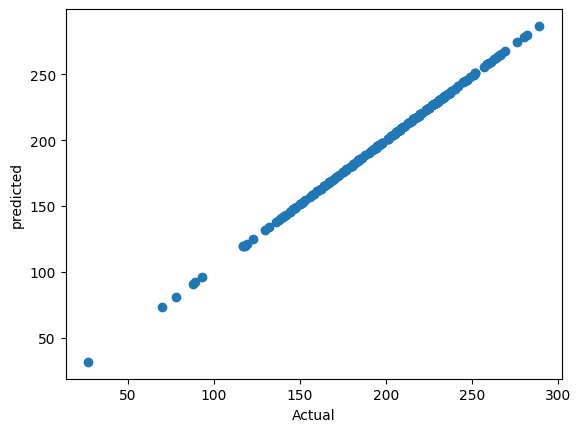

In [22]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual'),
plt.ylabel('predicted')

<Axes: xlabel='Total_score'>

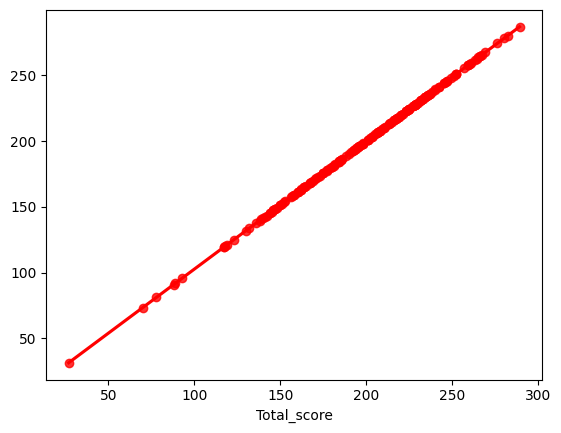

In [23]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [24]:
pred_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,259.496351,1.503649
737,192,192.429803,-0.429803
740,225,224.380749,0.619251
660,224,223.505701,0.494299
411,245,243.935278,1.064722
...,...,...,...
408,165,166.012226,-1.012226
332,171,171.743852,-0.743852
208,231,230.370205,0.629795
613,216,215.801926,0.198074
